RandomForest Regressor modeli farklı karar alma algoritmalarında veriden subsetler oluşturarak ortak bir karar almayı sağlayan kümelemeli makine öğrenme yöntemidir.
Öncelikle aşağıdaki hücrede gerekli kütüphane ve elemanları import ederek başlayalım.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
warnings.filterwarnings('ignore')

In [25]:
#TRAİN
df=pd.read_csv('arranged.csv')
x=df.drop(columns=['CO2_EMISSIONS_CURRENT','id','Unnamed: 0','CO2_EMISS_CURR_PER_FLOOR_AREA','ENERGY_CONSUMPTION_CURRENT']).values

y=df['CO2_EMISS_CURR_PER_FLOOR_AREA'].values

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = x[:-10],x[-10:],y[:-10],y[-10:] 

from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

n_estimators = 400
max_depth = 8
min_samples_split = 5
min_samples_leaf = 2
max_features = 'sqrt'
random_state = 0

# RandomForestRegressor'ü özelleştirilmiş parametrelerle oluşturun
regressor = RandomForestRegressor(n_estimators=n_estimators, 
                                  max_depth=max_depth, 
                                  min_samples_split=min_samples_split, 
                                  min_samples_leaf=min_samples_leaf, 
                                  max_features=max_features, 
                                  random_state=random_state, 
                                  oob_score=True)
regressor.fit(x_train, y_train)


RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=400, oob_score=True,
                      random_state=0)

In [27]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(x_test)

rf_mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {rf_mse}')

rf_mae=mean_absolute_error(y_test,predictions)
print(rf_mae)

rf_r2 = r2_score(y_test, predictions)
print(f'R-squared: {rf_r2}')

Out-of-Bag Score: -0.03568830251016952
Mean Squared Error: 19.130001623699485
3.706799397036364
R-squared: 0.437518329206131


Anlaşılan random forest regressor modelimiz de numpy arraylarına dönürülmesi gereken bir yapı yok. Direk dataframe'den eğitim yapabilriirz.
Ama dataframe'i benzer alt kümelrde eğitmek için kullanabilriiz. Yani model çok geniş olduğu için tümden bir eğitim yerine benzer özellikler vs. gibi sınıflandırarak alt kümelerde eğitmeyi dene.

In [28]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model=SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
# Making predictions on the same data or new data

# # Evaluating the model
svr_mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {svr_mse}')

svr_mae=mean_absolute_error(y_test,predictions)
print('mae:',svr_mae)

svr_r2 = r2_score(y_test, predictions)
print(f'R-squared: {svr_r2}')


Mean Squared Error: 25.874259859836094
mae: 3.9888307151367948
R-squared: 0.23921611702922385


In [29]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=6)

xgb_model.fit(X_train_scaled, y_train, eval_metric="rmse")

y_pred = xgb_model.predict(X_test_scaled)
# # Evaluating the model
xgb_mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {xgb_mse}')

xgb_mae=mean_absolute_error(y_test,predictions)
print('mae:',xgb_mae)

xgb_r2 = r2_score(y_test, predictions)
print(f'R-squared: {xgb_r2}')


Mean Squared Error: 25.874259859836094
mae: 3.9888307151367948
R-squared: 0.23921611702922385


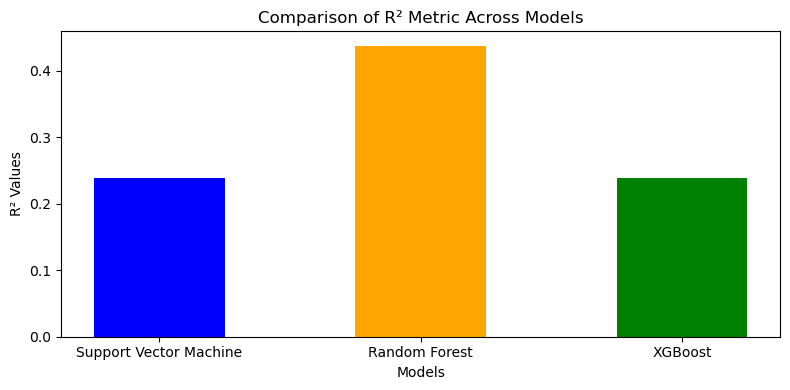

In [30]:
models = ['Support Vector Machine', 'Random Forest', 'XGBoost']

# R2 Metrik değerleri (örnek değerler, gerçek değerlerle değiştirilmeli)
r2_values = [svr_r2, rf_r2, xgb_r2]  # Örnek R² değerleri

# Grafik çizimi
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.5  # Sütun genişliği

# Sütunları oluşturma
ax.bar(models, r2_values, bar_width, color=['blue', 'orange', 'green'])

# Eksen etiketleri ve başlık
ax.set_xlabel('Models')
ax.set_ylabel('R² Values')
ax.set_title('Comparison of R² Metric Across Models')

# Grafik ayarları
plt.tight_layout()
plt.show()

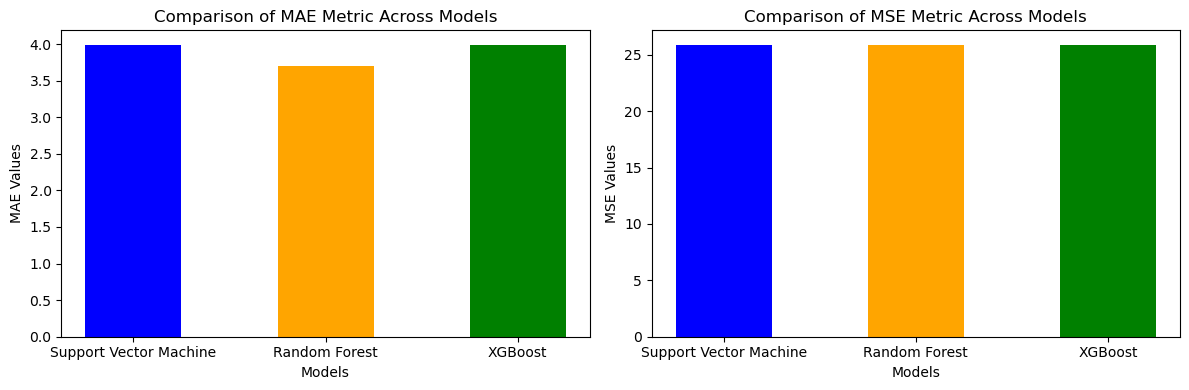

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Model isimleri
models = ['Support Vector Machine', 'Random Forest', 'XGBoost']

# MAE Metrik değerleri (örnek değerler, gerçek değerlerle değiştirilmeli)
mae_values = [svr_mae, rf_mae, xgb_mae]  # Örnek MAE değerleri

# MSE Metrik değerleri (örnek değerler, gerçek değerlerle değiştirilmeli)
mse_values = [svr_mse, xgb_mse, xgb_mse]  # Örnek MSE değerleri

# Grafik çizimi için ayarlar
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # İki grafik yan yana
bar_width = 0.5  # Sütun genişliği

# MAE için grafik çizimi
axes[0].bar(models, mae_values, bar_width, color=['blue', 'orange', 'green'])
axes[0].set_title('Comparison of MAE Metric Across Models')
axes[0].set_ylabel('MAE Values')
axes[0].set_xlabel('Models')

# MSE için grafik çizimi
axes[1].bar(models, mse_values, bar_width, color=['blue', 'orange', 'green'])
axes[1].set_title('Comparison of MSE Metric Across Models')
axes[1].set_ylabel('MSE Values')
axes[1].set_xlabel('Models')

# Grafik ayarları
plt.tight_layout()
plt.show()